In [1]:
# basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
sns.set(style="darkgrid")
warnings.filterwarnings('ignore')

<h2>Cleaning the Data<h2>

In [2]:
# loading dataset
data=pd.read_csv('/kaggle/input/imdb-top-100-movies/movies.csv')
df=data.copy()
df.head()

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,1.0,The Godfather,(1972),R,175 min,"Crime, Drama",9.2,"1,860,471",$134.97M
1,2.0,The Silence of the Lambs,(1991),R,118 min,"Crime, Drama, Thriller",8.6,"1,435,344",$130.74M
2,3.0,Star Wars: Episode V - The Empire Strikes Back,(1980),PG,124 min,"Action, Adventure, Fantasy",8.7,"1,294,805",$290.48M
3,4.0,The Shawshank Redemption,(1994),R,142 min,Drama,9.3,"2,683,302",$28.34M
4,5.0,The Shining,(1980),R,146 min,"Drama, Horror",8.4,"1,025,560",$44.02M


In [3]:
# droping index column
df.drop('index',axis=1,inplace=True)

In [4]:
# check missing values
df.isnull().sum().sort_values(ascending = False)

gross_total        1
movie_name         0
year_of_release    0
category           0
run_time           0
genre              0
imdb_rating        0
votes              0
dtype: int64

In [5]:
df[df['gross_total'].isnull()]

,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
65,To Have and Have Not,(1944),Passed,100 min,"Adventure, Comedy, Film-Noir",7.8,"35,528",NaN


In [6]:
# fill missing values with 0
df.fillna(0,inplace=True)
df.isnull().sum()

movie_name         0
year_of_release    0
category           0
run_time           0
genre              0
imdb_rating        0
votes              0
gross_total        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_name       99 non-null     object 
 1   year_of_release  99 non-null     object 
 2   category         99 non-null     object 
 3   run_time         99 non-null     object 
 4   genre            99 non-null     object 
 5   imdb_rating      99 non-null     float64
 6   votes            99 non-null     object 
 7   gross_total      99 non-null     object 
dtypes: float64(1), object(7)
memory usage: 6.3+ KB


In [8]:
df.describe()

,imdb_rating
count,99.000000
mean,8.348485
std,0.368772
min,7.200000
25%,8.100000
50%,8.300000
75%,8.600000
max,9.300000


In [9]:
df.columns

Index(['movie_name', 'year_of_release', 'category', 'run_time', 'genre',
       'imdb_rating', 'votes', 'gross_total'],
      dtype='object')

<h1>Data Visualization<h1>

<h2>Visualization of Rating Distribution<h2>

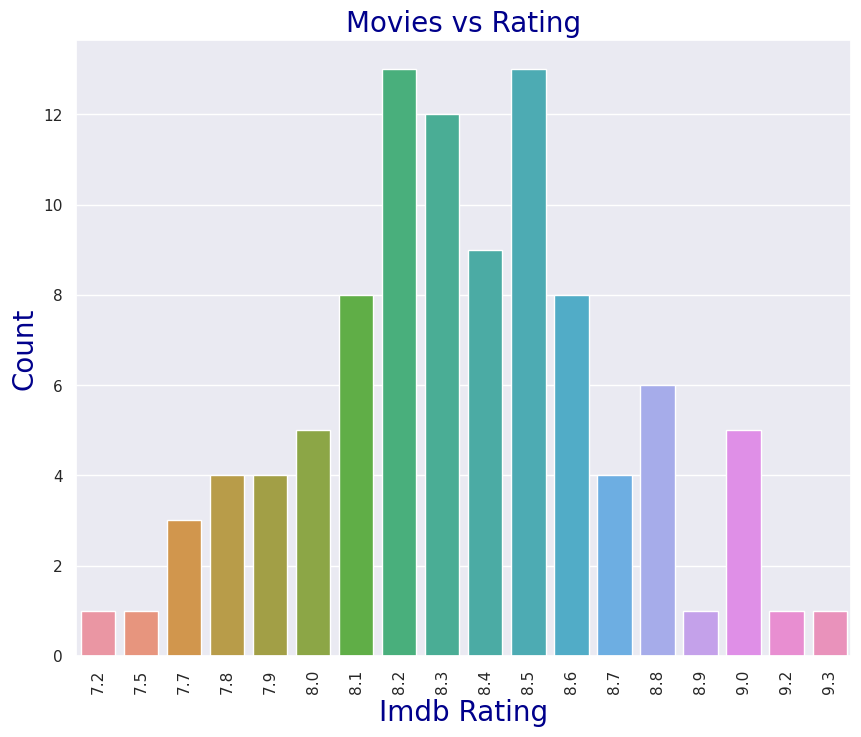

In [10]:
plt.figure(figsize = (10, 8))
sns.countplot(data=df, x="imdb_rating")
plt.title('Movies vs Rating', fontdict={'size':20,'color':'darkblue'})
plt.xlabel('Imdb Rating', fontdict={'size':20,'color':'darkblue'})
plt.xticks(rotation=90)
plt.ylabel('Count',fontdict={'size':20,'color':'darkblue'})
sns.color_palette("pastel")
plt.show()

<h2>Visualization of Category Distribution<h2>

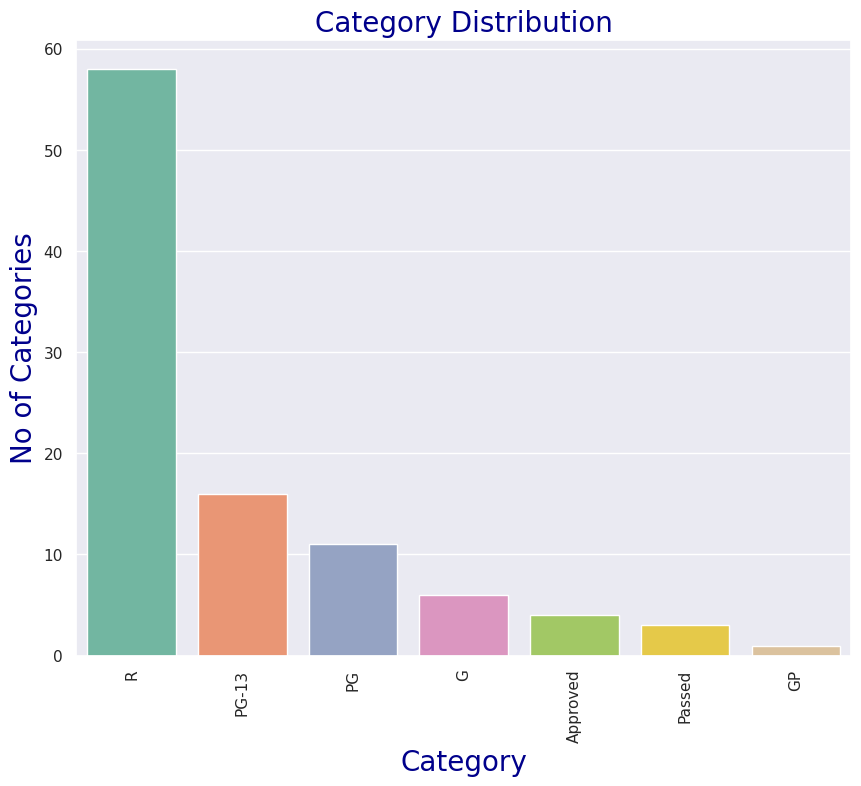

In [11]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.countplot(x="category", data=df, palette="Set2", order=df['category'].value_counts().index[0:15])
plt.title('Category Distribution',fontdict={'size':20,'color':'darkblue'})
plt.xlabel('Category', fontdict={'size':20,'color':'darkblue'})
plt.xticks(rotation=90)
plt.ylabel('No of Categories',fontdict={'size':20,'color':'darkblue'}) 
plt.show()

<h2>Yearwise Distribution<h2>

In [12]:
#cleaning the year of release and change the data type to int
df['year_of_release'] = df['year_of_release'].str.replace('(', '')
df['year_of_release'] = df['year_of_release'].str.replace(')', '')

df['year_of_release'] = df['year_of_release'].astype('int64')


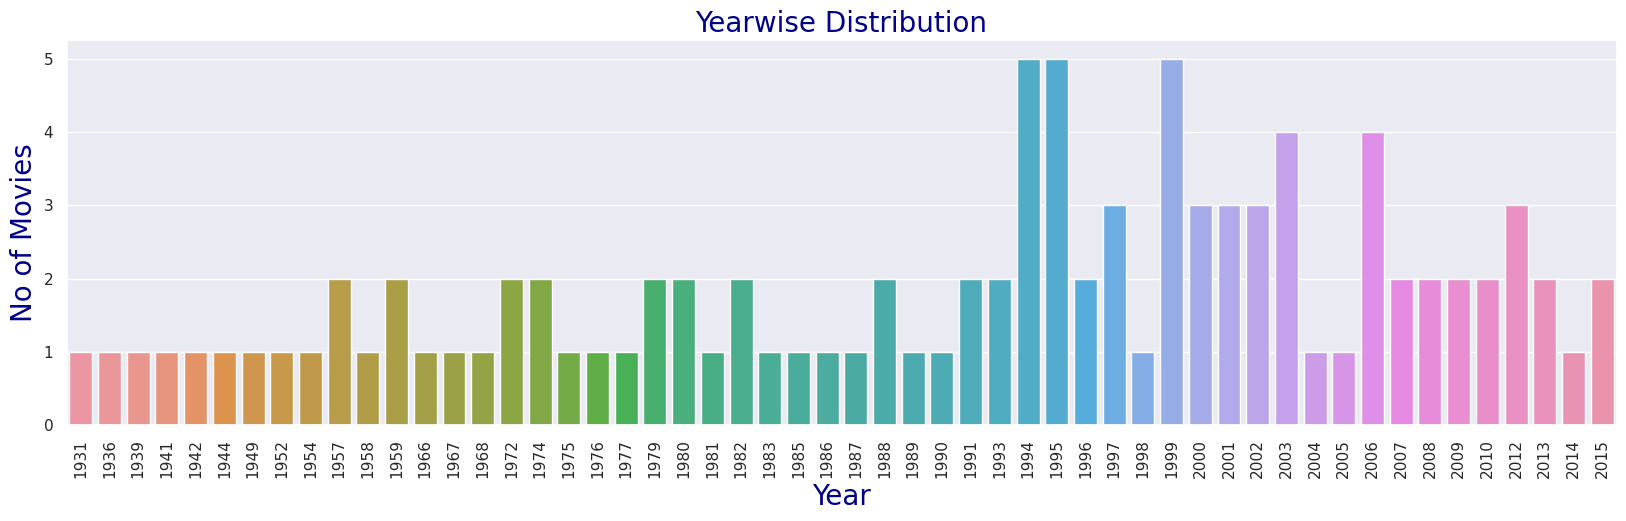

In [13]:
plt.figure(figsize=(20,5))
sns.set(style="darkgrid")
plt.title('Yearwise Distribution',fontdict={'size':20,'color':'darkblue'})
ax = sns.countplot(x="year_of_release", data=df)
plt.xlabel('Year', fontdict={'size':20,'color':'darkblue'})
plt.xticks(rotation=90)
plt.ylabel('No of Movies',fontdict={'size':20,'color':'darkblue'})
sns.color_palette("mako", as_cmap=True)
plt.show()

<h2>Vizualization of Most Common genres<h2>

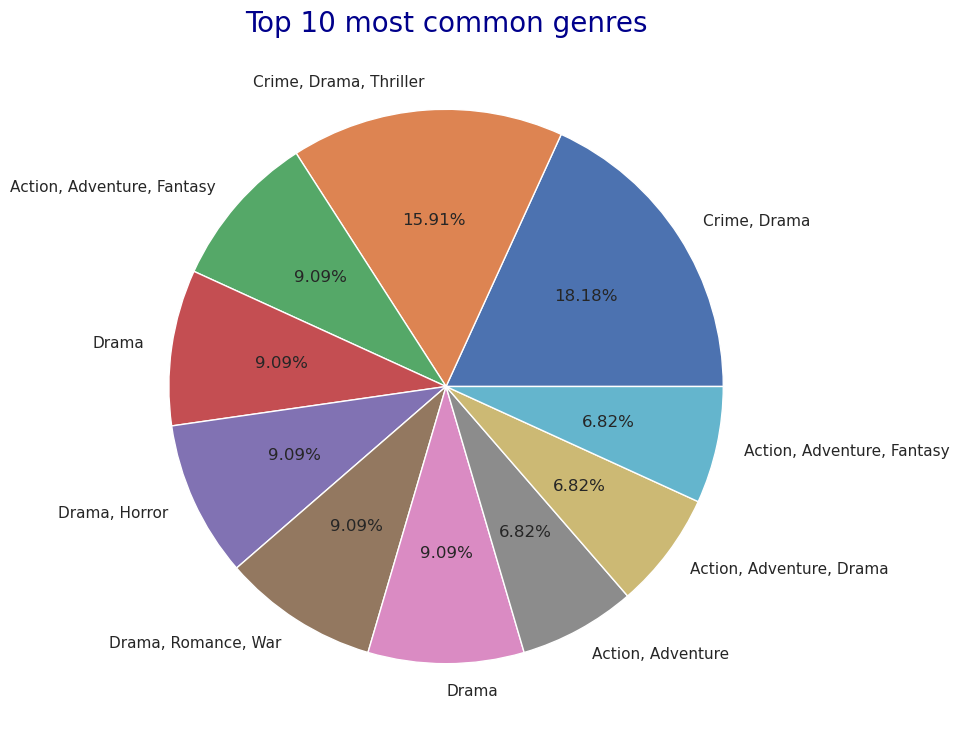

In [14]:
def top_genre_pie_chart(value):
    fig = plt.figure(figsize =(10, 9))
    plt.pie(df['genre'].value_counts().head(value), labels = df['genre'].head(value), autopct='%1.2f%%')
    plt.title(f'Top {value} most common genres',fontdict={'size':20,'color':'darkblue'})
    plt.show()

#value limit 55
top_genre_pie_chart(10)